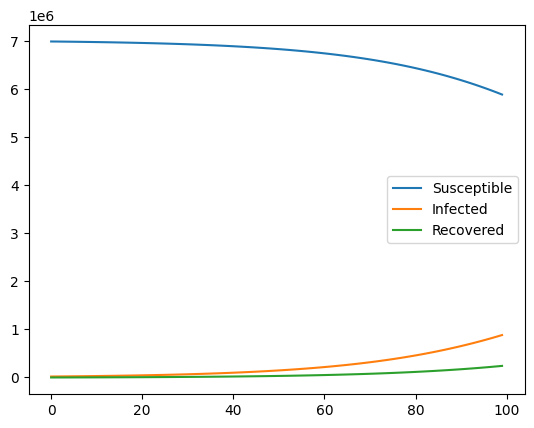

In [26]:
import sympy as sym
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

'''This is the model, N is the total population'''

S  = sym.Symbol('S')
I = sym.Symbol('I')
R = sym.Symbol('R')
gamma = sym.Symbol('γ')
beta = sym.Symbol('β')
N = 7_000_000

dS = -beta*S * I/N
dI = beta*S*I/N - gamma * I
dR = gamma * I

F = sym.Matrix([dS,dI,dR])
X = sym.Matrix([S,I,R])
J = F.jacobian(X)
J_func = sym.lambdify((S,I,R,gamma,beta), J)


def RHS(t,state):
        
    beta=0.05
    gamma = 0.01
    S,I,R = state

    dS = -beta*S * I/N
    dI = beta*S*I/N - gamma * I
    dR = gamma * I
 
    return np.array([dS,dI,dR])
    
t_span = (0.0, 100.0)
y0 = [6_980_000,20_000,0]
result_solve_ivp = solve_ivp(RHS, t_span, y0, args=(),t_eval = np.linspace(0,100,100),method= 'LSODA',jac=J_func)

labels = ['Susceptible','Infected','Recovered']

for i in range(3): 
    plt.plot(np.arange(0,100),result_solve_ivp.y[i,:],label = labels[i])

plt.legend()


